In [0]:
#Pham Huu Thanh Binh
# Tampere University of Technology 
#Import library


In [2]:
import numpy as np
from keras import layers
import keras
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Subtract
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
import glob
from PIL import Image
# for current forlder
import os 
from skimage import color
from skimage import io
import fnmatch

#



Using TensorFlow backend.


In [3]:
print('TF version: ' + tf.__version__)
print('Keras version: ' +keras.__version__)
print(os.getcwd())

from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

TF version: 1.12.0
Keras version: 2.2.4
/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
image_list = []
googleparth = 'drive/My Drive/Colab Notebooks/code/data/rawdata/*.png'
image_dir = (googleparth)
print(image_dir)
image_list_grey = []
image_list_grey_noise = []
image_list_residual_error = []
mean = 0
std = 25/255.0
np.random.seed(9001)
# set the size of process images. 
h = 512
w = 512
for filename in glob.glob(image_dir): 
     # Process Grey Images
     keep_grey = color.rgb2gray(io.imread(filename))
     if (int(keep_grey.shape[0]) >= h and int(keep_grey.shape[1]) >= w):
         keep_grey = np.array(keep_grey)[0:h,0:w]
         image_list_grey.append(keep_grey)
         keep_grey = []

drive/My Drive/Colab Notebooks/code/data/rawdata/*.png


In [0]:
image_list_grey = np.asarray(image_list_grey)
image_list_grey_noise = image_list_grey + np.random.normal(mean, std, ((h,w)))
image_list_residual_error = image_list_grey_noise - image_list_grey

In [6]:
print(image_list_grey.shape)
print(image_list_grey_noise.shape)
print(image_list_residual_error.shape)

(785, 512, 512)
(785, 512, 512)
(785, 512, 512)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(image_list_grey_noise, image_list_grey, test_size=0.01, random_state=123)


In [0]:
X_train = X_train.reshape(X_train.shape[0], h, w, 1)
y_train = y_train.reshape(y_train.shape[0], h, w, 1)
X_test = X_test.reshape(X_test.shape[0], h, w, 1)


In [9]:
X_train.shape

(777, 512, 512, 1)

In [10]:
X_test[1].shape

(512, 512, 1)

standardize our dataset

In [0]:
X_train = X_train/255
y_train = y_train/255


In [0]:
def DnCNN_Model(input_shape):
    
    X_input = Input(input_shape)
    print(X_input)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3), strides = (1, 1), padding='same', name = 'conv0')(X_input)
    #X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
     # 15 layers, Conv+BN+relu
    for i in range(10):
        X = Conv2D(64, (3, 3), strides=(1,1), padding='same')(X)
        if (i % 2 == 0):
          X = (Dropout(0.5))(X)
        X = BatchNormalization(axis=-1, epsilon=1e-3)(X)
        X = Activation('relu')(X)   
    X = Conv2D(1,(3,3), strides=(1,1), padding='same')(X)
    X = Subtract()([X_input, X])
    model = Model(inputs=X_input, outputs=X)
    return model

In [13]:
print(X_train[1,:].shape)

(512, 512, 1)


In [14]:
usingModel = DnCNN_Model(X_train[1,:].shape)

Tensor("input_1:0", shape=(?, 512, 512, 1), dtype=float32)


In [0]:
usingModel.compile(loss='mse', optimizer="adam")


In [16]:
usingModel.fit(x = X_train ,y = y_train, epochs = 30, batch_size = 1)


Epoch 1/30
777/777 [==============================] - 444s 572ms/step - loss: 0.0121
Epoch 2/30
777/777 [==============================] - 439s 566ms/step - loss: 4.4031e-05
Epoch 3/30
777/777 [==============================] - 440s 567ms/step - loss: 6.5884e-05
Epoch 4/30
777/777 [==============================] - 440s 567ms/step - loss: 9.1614e-06
Epoch 5/30
777/777 [==============================] - 441s 567ms/step - loss: 5.8225e-06
Epoch 6/30
777/777 [==============================] - 441s 568ms/step - loss: 6.9891e-06
Epoch 7/30
777/777 [==============================] - 440s 567ms/step - loss: 2.3406e-06
Epoch 8/30
777/777 [==============================] - 439s 565ms/step - loss: 0.0022
Epoch 9/30
777/777 [==============================] - 438s 564ms/step - loss: 1.8559e-05
Epoch 10/30
777/777 [==============================] - 438s 564ms/step - loss: 5.7651e-06
Epoch 11/30
777/777 [==============================] - 438s 564ms/step - loss: 3.4504e-06
Epoch 12/30
777/777 [======

In [0]:
x= usingModel.predict(X_test)

**The** **damaged** **image**

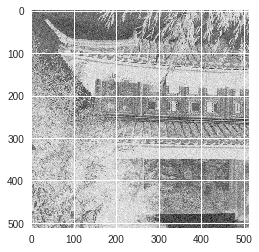

In [21]:
plt.imshow(X_test[3].reshape(512,512))


**The recovered image**

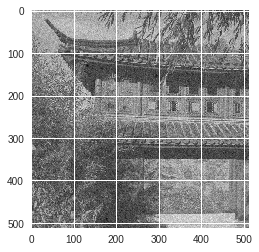

In [18]:
plt.imshow(x[3].reshape(512,512),cmap='gray')


**The original image**

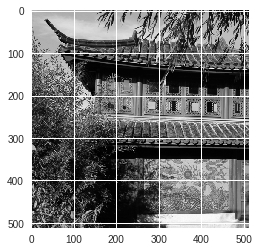

In [20]:
plt.imshow(y_test[3],cmap='gray')

**The original input **

For flowing images, the recovered, demaged and orignal input images. 

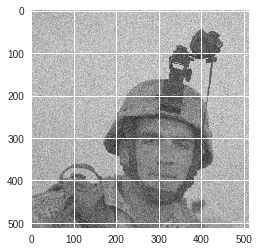

In [33]:
plt.imshow(x[4].reshape(512,512),cmap='gray')

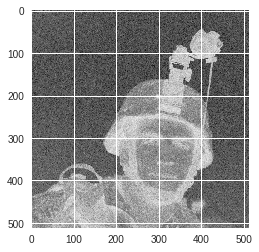

In [34]:
plt.imshow(X_test[4].reshape(512,512))

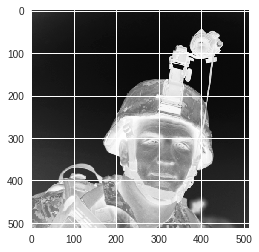

In [36]:
plt.imshow(y_test[4].reshape(512,512))
